# <b>Insurance Analysis</b>

Author: Osman Muglu

Date Created: 21-04-2021

Data source: https://www.kaggle.com/mirichoi0218/insurance

## Index


<ol>
    <li>Forming the dataframe</li>
    <li>Exploratory data analysis</li>
    <li>Conclusion</li>
</ol>

# <b>1. Forming The Dataframe</b>

### 1.1 Importing The Required Packages

In [76]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In this data set are 11 columns, these are:
<ul>
<li><b>Age</b> - Age, </li>
<li><b>Sex</b> - Sex,</li>
<li><b>BMI</b> - Body Mass Index</li>
<li><b>Children</b> - # children of the patient, </li>
<li><b>Smoker</b> - Smoker,</li>
<li><b>Region</b> - Region ,</li>
<li><b>Charges</b> - Amount of charges,</li>
</ul>  

### 1.2 Read The CSV File

In [77]:
df= pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# <b>2. Explotary Data Analysis</b>


### 2.1 Dataframe Description

In [78]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [79]:
df.shape

(1338, 7)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<i>Preprossing data</i>

In [81]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

<i>Explanation symbols</i>

Sex: "0" = Female\
Sex: "1" = Male

Smoker: "0" = No\
Smoker: "1" = Yes




In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [83]:
sex = df.groupby(by = 'sex').size()
print(sex)
smoker = df.groupby(by = 'smoker').size()
print(smoker)
region = df.groupby(by = 'region').size()
print(region)

sex
0    662
1    676
dtype: int64
smoker
0    1064
1     274
dtype: int64
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


Correlation

<AxesSubplot:>

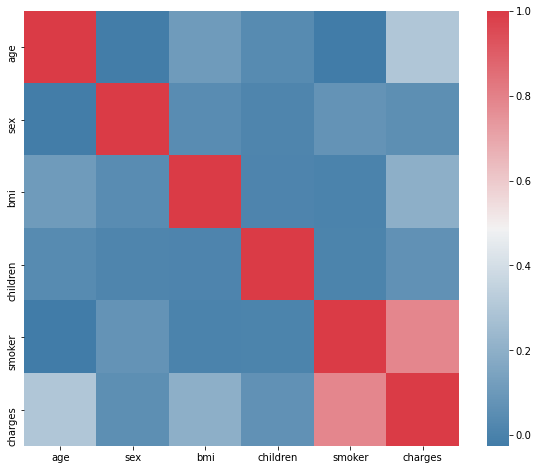

In [84]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

### 2.2 Smokers and Charges Analysis

#### 2.2.1 Charges

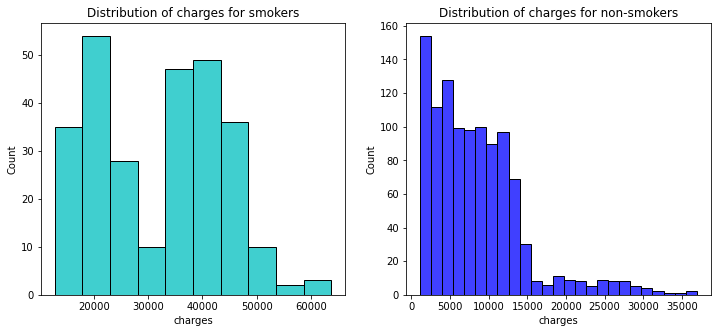

In [112]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

<i>Create extra column</i>

In [86]:
df['charges_bins'] = pd.cut(df['charges'], bins=[0, 15000, 30000, 45000, 60000, 75000])

df.head()

,age,sex,bmi,children,smoker,region,charges,charges_bins
0,19,0,27.900,0,1,southwest,16884.92400,"(15000, 30000]"
1,18,1,33.770,1,0,southeast,1725.55230,"(0, 15000]"
2,28,1,33.000,3,0,southeast,4449.46200,"(0, 15000]"
3,33,1,22.705,0,0,northwest,21984.47061,"(15000, 30000]"
4,32,1,28.880,0,0,northwest,3866.85520,"(0, 15000]"


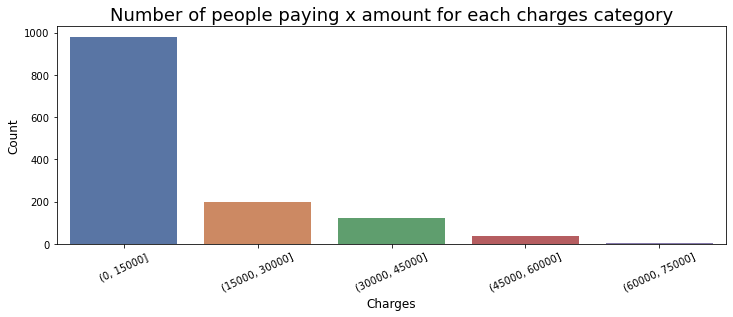

In [113]:
plt.figure(figsize=(12,4))
sns.countplot(x='charges_bins', data=df, palette='deep') 
plt.title('Number of people paying x amount for each charges category',size=18)
plt.xticks(rotation='25')
plt.ylabel('Count',size=12)
plt.xlabel('Charges',size=12)
plt.show()

#### 2.2.2 Sex


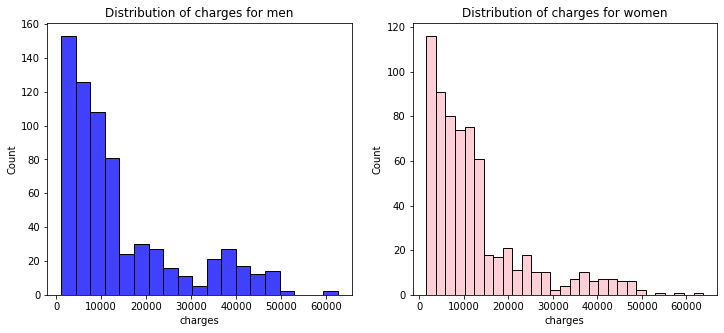

In [88]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(df[(df.sex == 1)]["charges"],color='b',ax=ax)
ax.set_title('Distribution of charges for men')

ax=f.add_subplot(122)
sns.histplot(df[(df.sex == 0)]['charges'],color='pink',ax=ax)
ax.set_title('Distribution of charges for women')
plt.show()



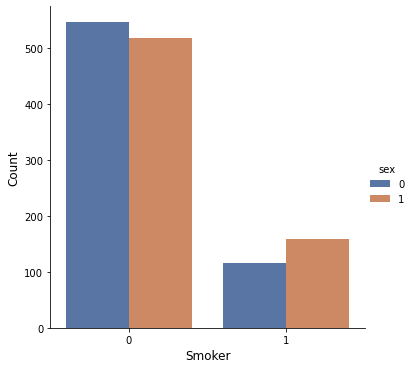

In [117]:
g = sns.catplot(x="smoker", kind="count",hue = 'sex', palette="deep", data=df)
plt.ylabel('Count',size=12)
plt.xlabel('Smoker',size=12)
plt.show()

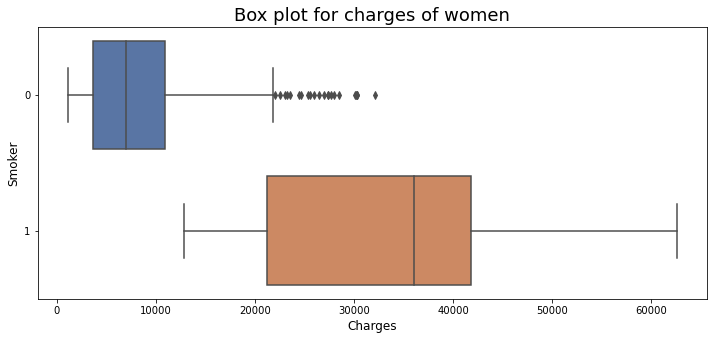

In [118]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women",size=18)
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'deep')
plt.ylabel('Smoker',size=12)
plt.xlabel('Charges',size=12)
plt.show()

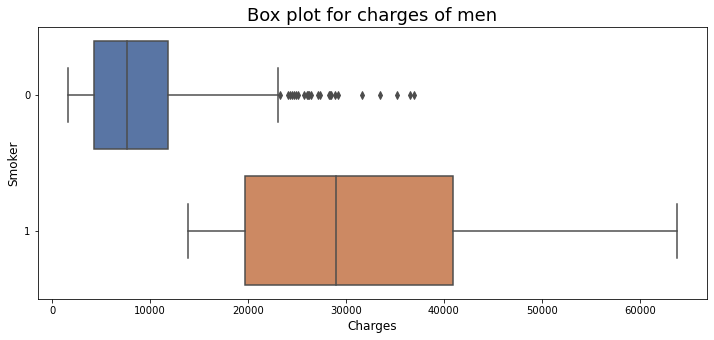

In [119]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men",size=18)
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'deep')
plt.ylabel('Smoker',size=12)
plt.xlabel('Charges',size=12)
plt.show()

#### 2.2.3 Age

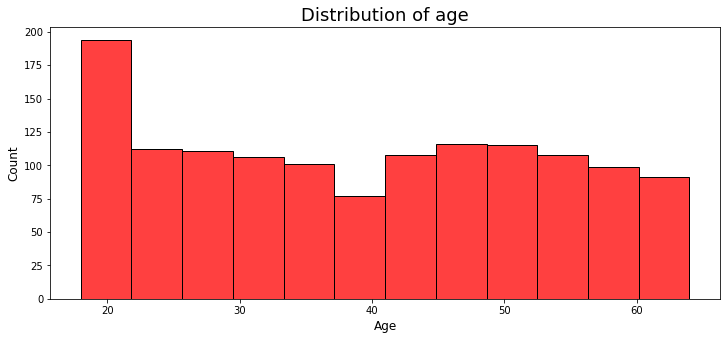

In [121]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age",size=18)
ax = sns.histplot(df["age"], color = 'r')
plt.ylabel('Count',size=12)
plt.xlabel('Age',size=12)
plt.show()

<i> Age of 20</i>

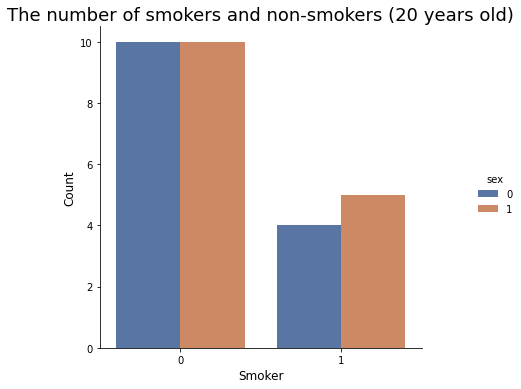

In [122]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="deep", data=df[(df.age == 20)])
plt.title("The number of smokers and non-smokers (20 years old)", size=18)
plt.ylabel('Count',size=12)
plt.xlabel('Smoker',size=12)
plt.show()

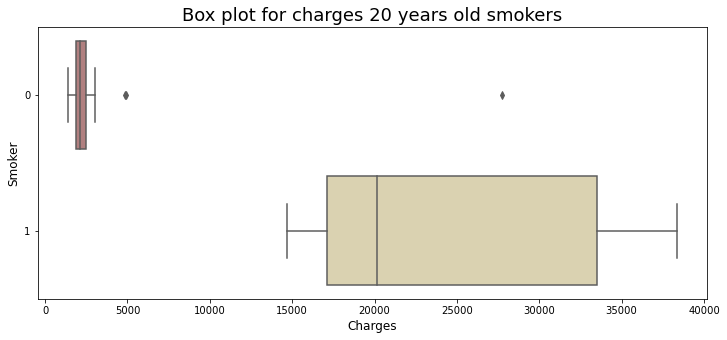

In [123]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 20 years old smokers", size=18)
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 20)] , orient="h", palette = 'pink')
plt.ylabel('Smoker',size=12)
plt.xlabel('Charges',size=12)
plt.show()

<i>Age of 50</i>

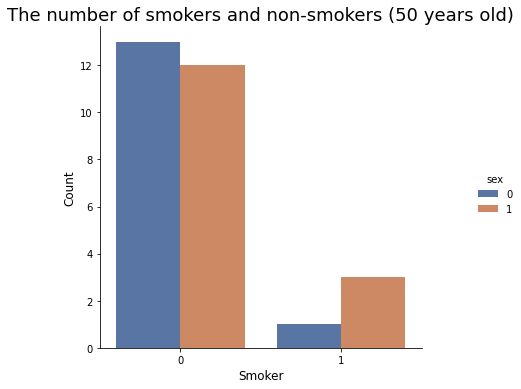

In [125]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="deep", data=df[(df.age == 50)])
plt.title("The number of smokers and non-smokers (50 years old)", size=18)
plt.ylabel('Count',size=12)
plt.xlabel('Smoker',size=12)
plt.show()

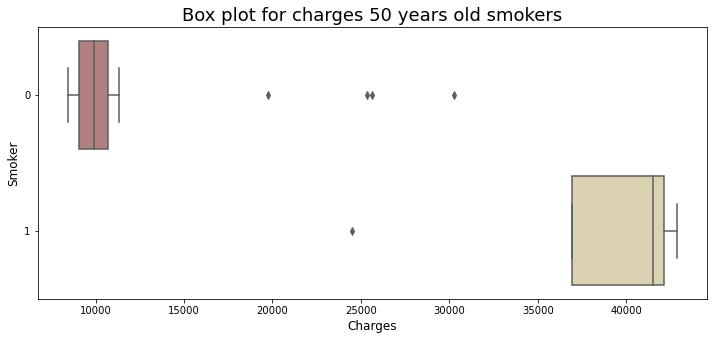

In [124]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 50 years old smokers", size=18)
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 50)] , orient="h", palette = 'pink')
plt.ylabel('Smoker',size=12)
plt.xlabel('Charges',size=12)
plt.show()

<i>Non-smokers and smokers that are getting older</i>

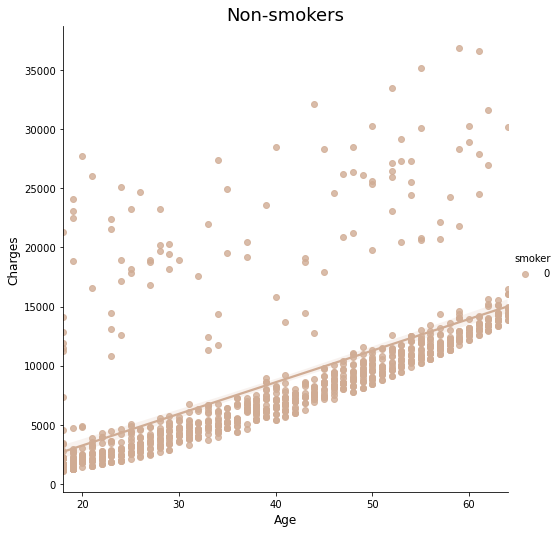

In [127]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df[(df.smoker == 0)], palette = 'pink', height = 7)
plt.title('Non-smokers', size=18)
plt.ylabel('Charges',size=12)
plt.xlabel('Age',size=12)
plt.show()

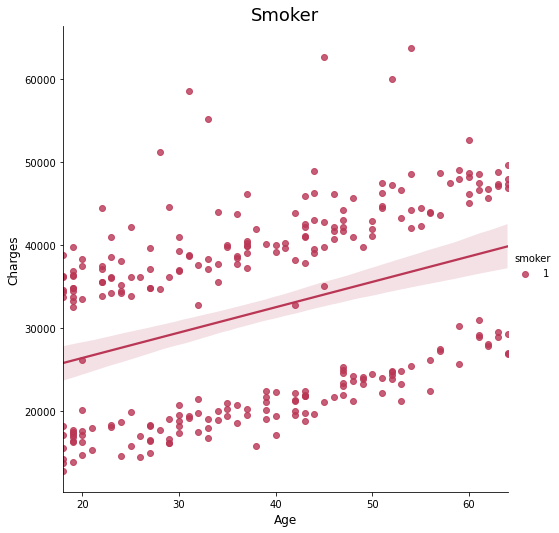

In [128]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df[(df.smoker == 1)], palette = 'inferno_r', height = 7)
plt.title('Smoker', size=18)
plt.ylabel('Charges',size=12)
plt.xlabel('Age',size=12)
plt.show()

#### 2.2.4 BMI

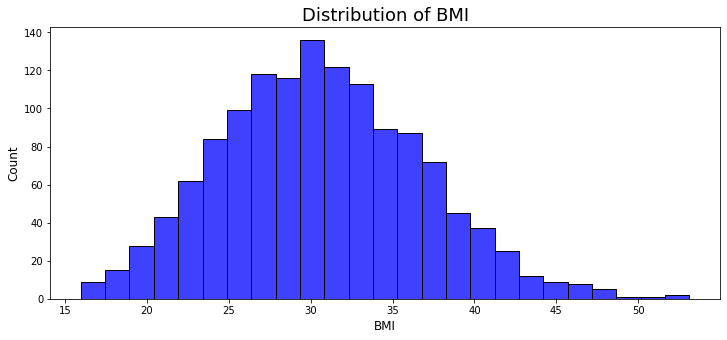

In [130]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI", size=18)
plt.ylabel('Count',size=12)
plt.xlabel('BMI',size=12)
ax = sns.histplot(df["bmi"], color = 'b')

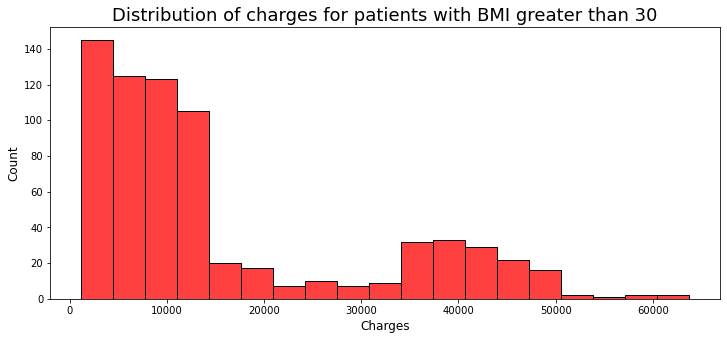

In [129]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30", size=18)
plt.ylabel('Count',size=12)
plt.xlabel('Charges',size=12)
ax = sns.histplot(df[(df.bmi >= 30)]['charges'], color = 'r')

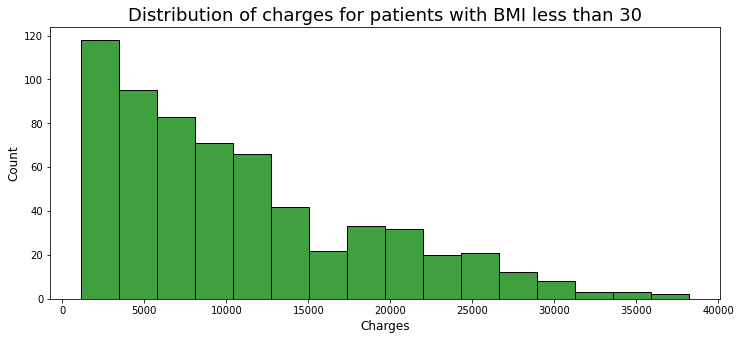

In [131]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30", size=18)
plt.ylabel('Count',size=12)
plt.xlabel('Charges',size=12)
ax = sns.histplot(df[(df.bmi < 30)]['charges'], color = 'g')

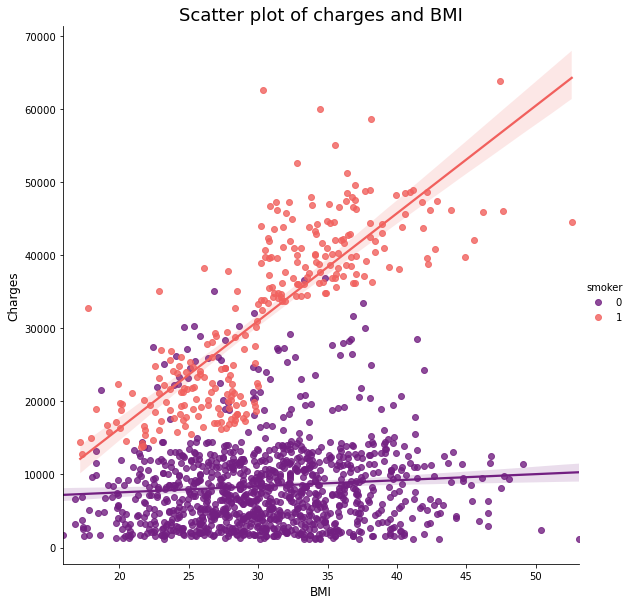

In [132]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', height = 8)
plt.title('Scatter plot of charges and BMI', size=18)
plt.ylabel('Charges',size=12)
plt.xlabel('BMI',size=12)
plt.show()

<i>Creating a new column</i>

In [103]:
bins = [0, 18.5, 25, 30, 35, 40, 60]
labels = ['Underweight', 'Average', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3']
df['bmi_bins'] = pd.cut(df['bmi'], bins=bins, labels=labels)

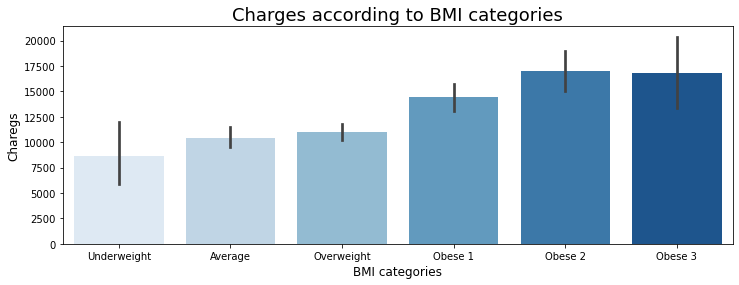

In [104]:
plt.figure(figsize=(12,4))
sns.barplot(x='bmi_bins', y='charges', data=df, palette='Blues')
plt.title('Charges according to BMI categories', size='18')
plt.ylabel('Charegs',size=12)
plt.xlabel('BMI categories',size=12)
plt.show()

#### 2.2.5 Patients With Children

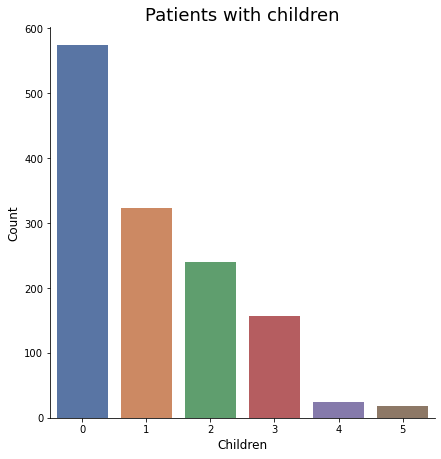

In [133]:
sns.catplot(x="children", kind="count", palette="deep", data=df, height = 6)
plt.title('Patients with children', size='18')
plt.ylabel('Count',size=12)
plt.xlabel('Children',size=12)
plt.show()

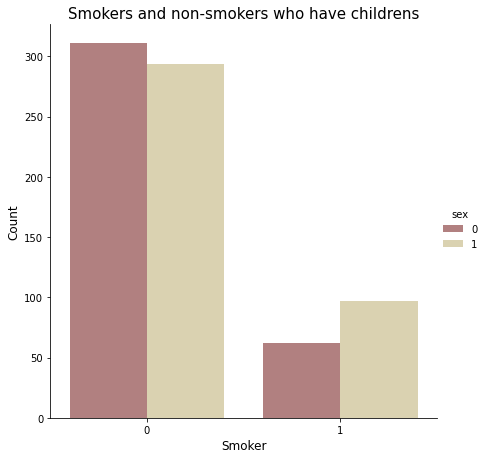

In [134]:
sns.catplot(x="smoker", kind="count", palette="pink",hue = "sex",
            data=df[(df.children > 0)], height = 6)
plt.title('Smokers and non-smokers who have childrens', size='15')
plt.ylabel('Count',size=12)
plt.xlabel('Smoker',size=12)
plt.show()

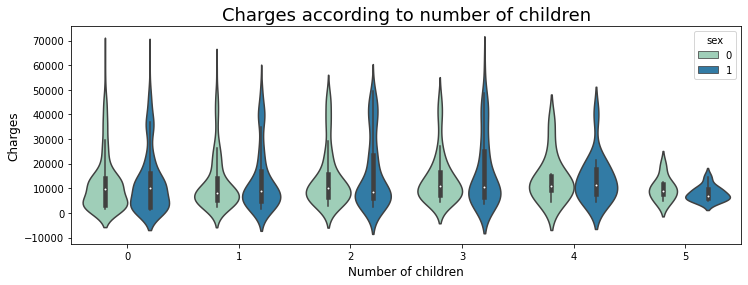

In [107]:
plt.figure(figsize=(12,4))
sns.violinplot(x='children', y='charges', data=df, hue='sex', palette='YlGnBu')
plt.title('Charges according to number of children', size='18')
plt.ylabel('Charges',size=12)
plt.xlabel('Number of children',size=12)
plt.show()

#### 2.2.5 Region

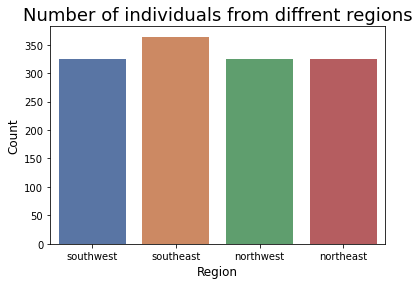

In [108]:
sns.countplot(x='region', data=df, palette='deep') 
plt.title('Number of individuals from diffrent regions', size='18')
plt.ylabel('Count',size=12)
plt.xlabel('Region',size=12)
plt.show()

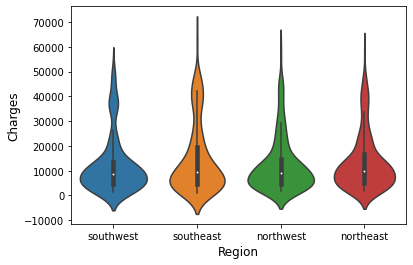

In [135]:
sns.violinplot(x = "region", y = "charges", data = df)
plt.ylabel('Charges',size=12)
plt.xlabel('Region',size=12)
plt.show()

In [110]:
meanregion = df.groupby(by = "region")["charges"].mean()
print(meanregion)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


### 3. Conclusions

<b>2.2 - Insurance analysis</b>

<b>2.2.1</b> - Charges: The graphs are showing us that the groups of patients that are smoking are spending more for their treatments. However, the extra column that we have created is showing us that most of the people are paying less than 15k for their insure costs. 

<b>2.2.2</b> - Sex: There are more non-smoking people. This group consists of more female than male. However, in the group of smokers is this the opposite. This group consist more males than females. For men and women, the smokers in these groups also pay more for them treatments.

<b>2.2.3</b> - Age: The data is showing us that the patients that are 20 years old are a lot in the dataset.  However, what stands out in the data is that even at a young age smokers pay much more than non-smokers. Also, we in the data we can see that there are more men smokers than women. When we look at the data of people that are 50 years old and smoke, we see that smokers pay much more money for their treatments. The last aspect that the data shows us is that smokers pay more for care than non-smokers as they get older.

<b>2.2.4</b> - BMI: The distribution of BMI tells us the average BMI is around 30. A high BMI can negatively impact someone’s health.  When dividing the data between two groups that consist of one with BMI greater than 30 and one with BMI less than 30, we see than the patients with a BMI over 30 spends more on treatment. When we add the data of smokers into a scatterplot with the data of BMI and the charges, we see that the charges increases a with huge amounts when the BMI increases. The extra column that we have created is showing us that the charges increase as we go up in classes. The classes obese 2 and 3 are paying the most. However, what stands out is that the class “underweight” are paying less than the “average” category.

<b>2.2.5</b> - Patients with children: When we look at the data, we do not really see new insights that are standing out. However, the violinplot is showing that the patient with 5 children have lower charges.  

<b>2.2.6</b> - Region: the data shows us that most of the patients are from southeast region. However, the regions do not show a lot of difference between them. The southeast region has slightly a higher mean than the others.